In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("streamed_songs.csv", encoding='latin1')
df.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


In [26]:
df['Release Date'] = pd.to_datetime(df['Release Date'])
print(f"Total number of columns: {len(df.columns.values)}")
# Strip any leading/trailing spaces from column names
#df.columns = df.columns.str.strip()
print(df.head())

Total number of columns: 31
                        Track                    Album Name          Artist  \
0         MILLION DOLLAR BABY  Million Dollar Baby - Single   Tommy Richman   
1                 Not Like Us                   Not Like Us  Kendrick Lamar   
2  i like the way you kiss me    I like the way you kiss me         Artemas   
3                     Flowers              Flowers - Single     Miley Cyrus   
4                     Houdini                       Houdini          Eminem   

  Release Date          ISRC All Time Rank  Track Score Spotify Streams  \
0   2024-04-26  QM24S2402528             1       725.40     390,470,936   
1   2024-05-04  USUG12400910             2       545.90     323,703,884   
2   2024-03-19  QZJ842400387             3       538.40     601,309,283   
3   2023-01-12  USSM12209777             4       444.90   2,031,280,633   
4   2024-05-31  USUG12403398             5       423.30     107,034,922   

  Spotify Playlist Count Spotify Playlist Reac

In [25]:
'''cols = list(df.columns.values)
print(cols)'''

['Track', 'Album Name', 'Artist', 'Release Date', 'ISRC', 'All Time Rank', 'Track Score', 'Spotify Streams', 'Spotify Playlist Count', 'Spotify Playlist Reach', 'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts', 'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach', 'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins', 'Deezer Playlist Count', 'Deezer Playlist Reach', 'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations', 'Soundcloud Streams', 'Shazam Counts', 'TIDAL Popularity', 'Explicit Track', 'month', 'year']


In [22]:
#df_modified = df.iloc[:,[0,1,2,3,4,5,6,8]]
#print(df_modified.head())
'''df_modified = df[cols[0:7]+[cols[8]]+[cols[10]]+cols[11:13]+cols[18:22]+[cols[23]]+cols[24:27]+[cols[28]]]
print(df_modified.isnull().sum())
print(df_modified.head(5))'''

Track                        0
Album Name                   0
Artist                       5
Release Date                 0
ISRC                         0
All Time Rank                0
Track Score                  0
Spotify Playlist Count      70
Spotify Popularity         804
YouTube Views              308
YouTube Likes              315
AirPlay Spins              498
SiriusXM Spins            2123
Deezer Playlist Count      921
Deezer Playlist Reach      928
Pandora Streams           1106
Pandora Track Stations    1268
Soundcloud Streams        3333
Shazam Counts              577
Explicit Track               0
dtype: int64
                        Track                    Album Name          Artist  \
0         MILLION DOLLAR BABY  Million Dollar Baby - Single   Tommy Richman   
1                 Not Like Us                   Not Like Us  Kendrick Lamar   
2  i like the way you kiss me    I like the way you kiss me         Artemas   
3                     Flowers              Flowers 

Track                     0
Album Name                0
Artist                    0
Release Date              0
ISRC                      0
All Time Rank             0
Track Score               0
Spotify Playlist Count    0
Spotify Popularity        0
YouTube Views             0
YouTube Likes             0
AirPlay Spins             0
SiriusXM Spins            0
Deezer Playlist Count     0
Deezer Playlist Reach     0
Pandora Streams           0
Pandora Track Stations    0
Soundcloud Streams        0
Shazam Counts             0
Explicit Track            0
dtype: int64


In [27]:
numeric_columns = ['Track Score','Spotify Playlist Count','Spotify Popularity','YouTube Views','YouTube Likes','AirPlay Spins','SiriusXM Spins','Deezer Playlist Count',
                               'Deezer Playlist Reach','Pandora Streams','Pandora Track Stations','Soundcloud Streams','Shazam Counts']
print(df_modified[numeric_columns].dtypes)
df_modified = df[numeric_columns].copy()
for col in df_modified.columns:
    if df_modified[col].dtype == 'object':  # Check if the column is an object (string)
        df_modified[col] = df_modified[col].str.replace(',', '')  # Remove commas
    df_modified[col] = pd.to_numeric(df_modified[col], errors='coerce')

numeric_columns = df_modified.select_dtypes(include=[np.number]).columns.tolist()
pd.set_option('display.float_format', '{:.2f}'.format)
median_values = df_modified[numeric_columns].median()
df_modified.loc[:, numeric_columns] = df_modified.loc[:, numeric_columns].fillna(median_values)
#mean_values = df_modified[numeric_columns].mean()
#df_modified[numeric_columns] = df_modified[numeric_columns].fillna(mean_values)
#df_modified = df_modified.fillna(0)
print(df_modified.isnull().sum())
df_modified.head()

Track Score               float64
Spotify Playlist Count    float64
Spotify Popularity        float64
YouTube Views             float64
YouTube Likes             float64
AirPlay Spins             float64
SiriusXM Spins            float64
Deezer Playlist Count     float64
Deezer Playlist Reach     float64
Pandora Streams           float64
Pandora Track Stations    float64
Soundcloud Streams        float64
Shazam Counts             float64
dtype: object
Track Score               0
Spotify Playlist Count    0
Spotify Popularity        0
YouTube Views             0
YouTube Likes             0
AirPlay Spins             0
SiriusXM Spins            0
Deezer Playlist Count     0
Deezer Playlist Reach     0
Pandora Streams           0
Pandora Track Stations    0
Soundcloud Streams        0
Shazam Counts             0
dtype: int64


,Track Score,Spotify Playlist Count,Spotify Popularity,YouTube Views,YouTube Likes,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts
0,725.40,30716.00,92.00,84274754.00,1713126.00,40975.00,684.00,62.00,17598718.00,18004655.00,22931.00,4818457.00,2669262.00
1,545.90,28113.00,92.00,116347040.00,3486739.00,40778.00,3.00,67.00,10422430.00,7780028.00,28444.00,6623075.00,1118279.00
2,538.40,54331.00,92.00,122599116.00,2228730.00,74333.00,536.00,136.00,36321847.00,5022621.00,5639.00,7208651.00,5285340.00
3,444.90,269802.00,85.00,1096100899.00,10629796.00,1474799.00,2182.00,264.00,24684248.00,190260277.00,203384.00,3224599.00,11822942.00
4,423.30,7223.00,88.00,77373957.00,3670188.00,12185.00,1.00,82.00,17660624.00,4493884.00,7006.00,207179.00,457017.00


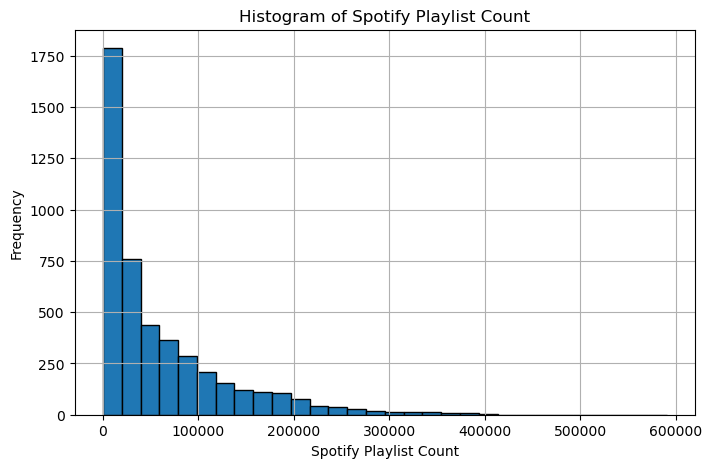

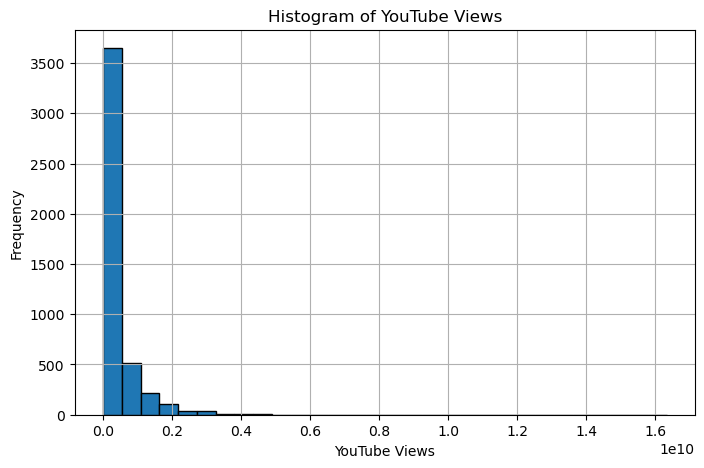

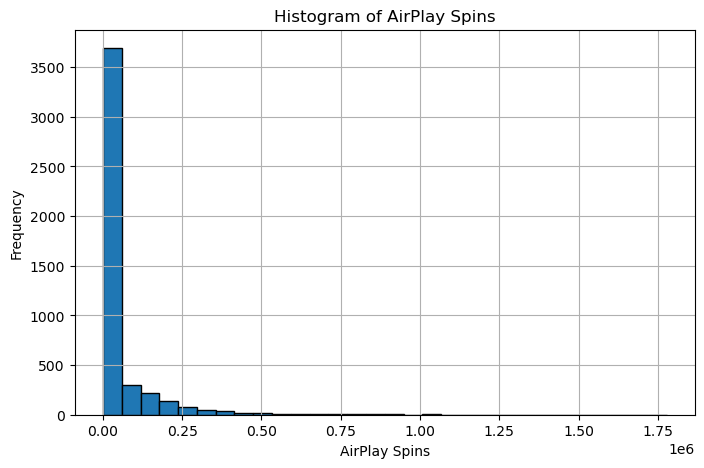

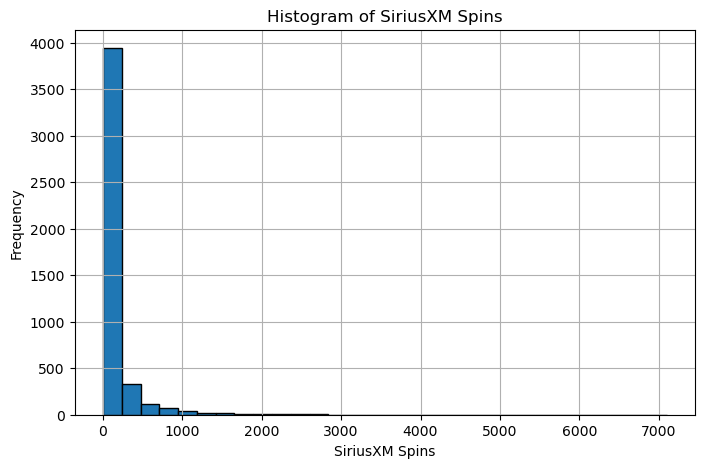

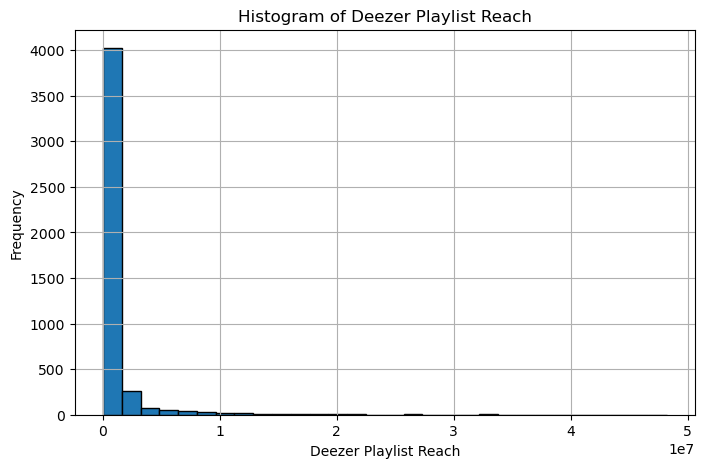

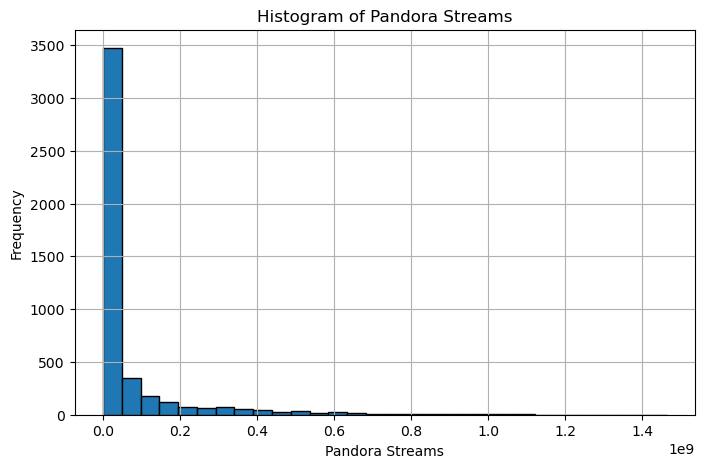

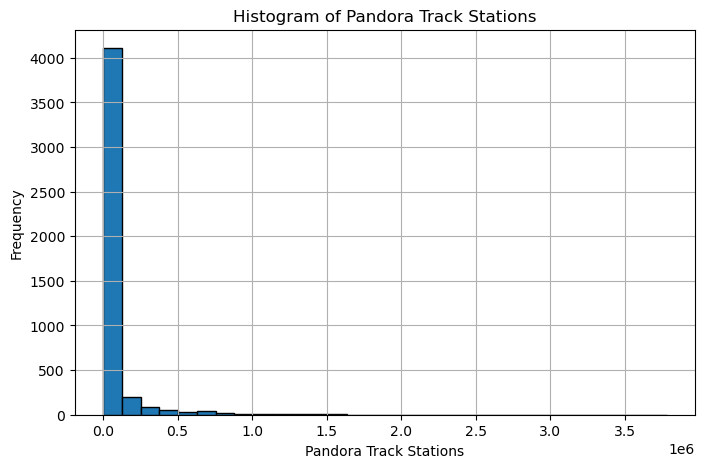

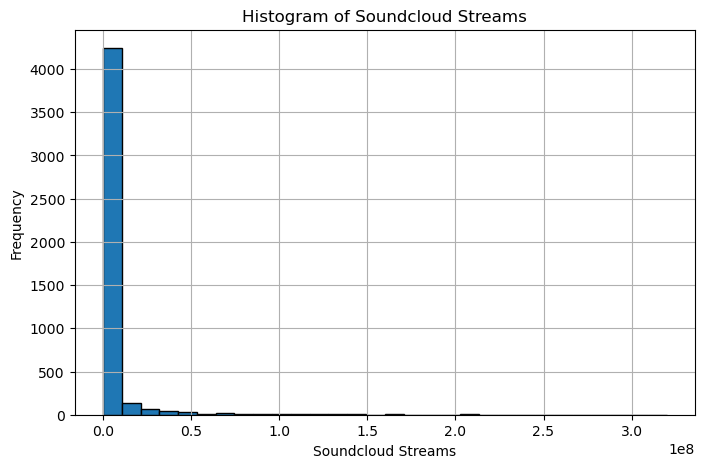

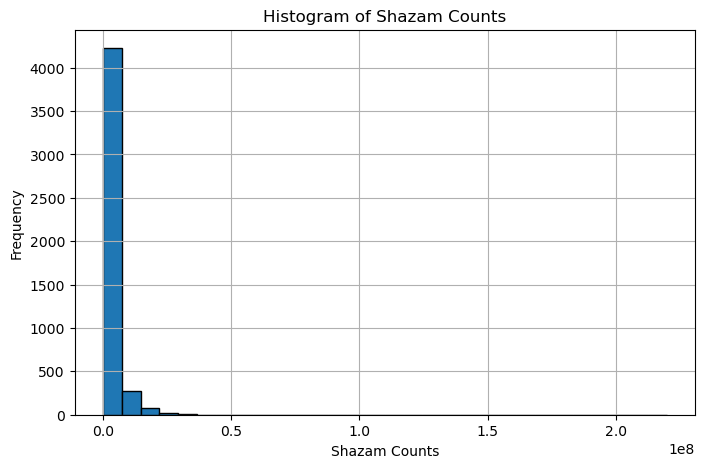

In [28]:
import matplotlib.pyplot as plt
platform = ['Spotify Playlist Count','YouTube Views','AirPlay Spins','SiriusXM Spins',
                               'Deezer Playlist Reach','Pandora Streams','Pandora Track Stations','Soundcloud Streams','Shazam Counts']

for col in platform:
    plt.figure(figsize=(8, 5))
    plt.hist(df_modified[col], bins=30, edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
plt.show()


In [29]:
def find_outliers_iqr(df_modified, column):
    Q1 = df_modified[column].quantile(0.25)
    Q3 = df_modified[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_modified[(df_modified[column] < lower_bound) | (df_modified[column] > upper_bound)]
    return outliers

outliers_dict = {}
for col in numeric_columns:
    outliers_dict[col] = find_outliers_iqr(df_modified, col)

for col, outliers in outliers_dict.items():
    if not outliers.empty:
        print(f"Outliers in {col}:")
        print(outliers)
        print("\n")
df_modified.head()


Outliers in Track Score:
     Track Score  Spotify Playlist Count  Spotify Popularity  YouTube Views  \
0         725.40                30716.00               92.00    84274754.00   
1         545.90                28113.00               92.00   116347040.00   
2         538.40                54331.00               92.00   122599116.00   
3         444.90               269802.00               85.00  1096100899.00   
4         423.30                 7223.00               88.00    77373957.00   
..           ...                     ...                 ...            ...   
401        76.30                17285.00               67.00   113081188.00   
402        76.20                  245.00               28.00   944088313.00   
403        76.20               186252.00               68.00       11512.00   
404        76.20               205482.00               80.00  2457588032.00   
405        76.20                77669.00               65.00   836072339.00   

     YouTube Likes  AirPla

,Track Score,Spotify Playlist Count,Spotify Popularity,YouTube Views,YouTube Likes,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts
0,725.40,30716.00,92.00,84274754.00,1713126.00,40975.00,684.00,62.00,17598718.00,18004655.00,22931.00,4818457.00,2669262.00
1,545.90,28113.00,92.00,116347040.00,3486739.00,40778.00,3.00,67.00,10422430.00,7780028.00,28444.00,6623075.00,1118279.00
2,538.40,54331.00,92.00,122599116.00,2228730.00,74333.00,536.00,136.00,36321847.00,5022621.00,5639.00,7208651.00,5285340.00
3,444.90,269802.00,85.00,1096100899.00,10629796.00,1474799.00,2182.00,264.00,24684248.00,190260277.00,203384.00,3224599.00,11822942.00
4,423.30,7223.00,88.00,77373957.00,3670188.00,12185.00,1.00,82.00,17660624.00,4493884.00,7006.00,207179.00,457017.00


In [11]:
#normalizing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
df_new= df_modified .copy()
scaler = MinMaxScaler()
#df_normalized = df_modified.copy()
df_new[numeric_columns] = scaler.fit_transform(df_new[numeric_columns])
#standardizing
#scaler = StandardScaler()
#df_new[numeric_columns] = scaler.fit_transform(df_new[numeric_columns])
df_new.head()

,Track Score,Spotify Playlist Count,Spotify Popularity,YouTube Views,YouTube Likes,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts
0,1.00,0.05,0.96,0.01,0.03,0.02,0.10,0.10,0.37,0.01,0.01,0.02,0.01
1,0.75,0.05,0.96,0.01,0.06,0.02,0.00,0.10,0.22,0.01,0.01,0.02,0.01
2,0.74,0.09,0.96,0.01,0.04,0.04,0.08,0.21,0.75,0.00,0.00,0.02,0.02
3,0.60,0.46,0.88,0.07,0.17,0.83,0.31,0.42,0.51,0.13,0.05,0.01,0.05
4,0.57,0.01,0.92,0.00,0.06,0.01,0.00,0.13,0.37,0.00,0.00,0.00,0.00


In [30]:
#mean usage for each platform
average_usage = df_new[platform].mean()
print("Average usage per track for each platform:")
print(average_usage)

Average usage per track for each platform:
Spotify Playlist Count   0.10
YouTube Views            0.02
AirPlay Spins            0.03
SiriusXM Spins           0.02
Deezer Playlist Reach    0.02
Pandora Streams          0.05
Pandora Track Stations   0.02
Soundcloud Streams       0.02
Shazam Counts            0.01
dtype: float64


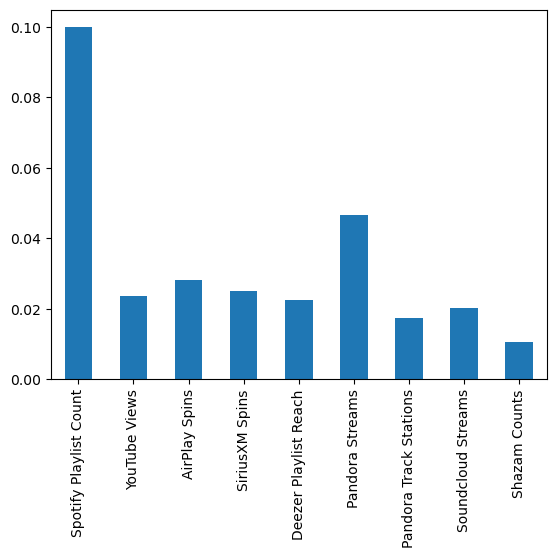

In [31]:
import matplotlib.pyplot as plt
# Bar chart for average usage
average_usage.plot(kind='bar', label='average usage', x='platform',y='average_usage')
#plt.title('Average Usage Per Platform')
#plt.xlabel('Platform')
#plt.ylabel('Average Usage')
plt.show()

In [35]:
if len(df) == len(df_new):
    df_new['Release Date'] = df['Release Date'].values
else:
    print("The dataframes do not have the same number of rows and cannot be directly merged.")
print(df_new.head())

   Track Score  Spotify Playlist Count  Spotify Popularity  YouTube Views  \
0         1.00                    0.05                0.96           0.01   
1         0.75                    0.05                0.96           0.01   
2         0.74                    0.09                0.96           0.01   
3         0.60                    0.46                0.88           0.07   
4         0.57                    0.01                0.92           0.00   

   YouTube Likes  AirPlay Spins  SiriusXM Spins  Deezer Playlist Count  \
0           0.03           0.02            0.10                   0.10   
1           0.06           0.02            0.00                   0.10   
2           0.04           0.04            0.08                   0.21   
3           0.17           0.83            0.31                   0.42   
4           0.06           0.01            0.00                   0.13   

   Deezer Playlist Reach  Pandora Streams  Pandora Track Stations  \
0                   0.3

In [39]:
df_new['month'] = df['Release Date'].dt.month
df_new['year'] = df['Release Date'].dt.year
performance_by_year = df_new.groupby('year')[['Spotify Playlist Count','YouTube Views','AirPlay Spins','SiriusXM Spins',
                               'Deezer Playlist Reach','Pandora Streams','Pandora Track Stations','Soundcloud Streams','Shazam Counts']].mean()
performance_by_month = df_new.groupby('month')[['Spotify Playlist Count','YouTube Views','AirPlay Spins','SiriusXM Spins',
                               'Deezer Playlist Reach','Pandora Streams','Pandora Track Stations','Soundcloud Streams','Shazam Counts']].mean()
print(performance_by_year)
print(performance_by_month)

      Spotify Playlist Count  YouTube Views  AirPlay Spins  SiriusXM Spins  \
year                                                                         
1987                    0.50           0.12           0.08            0.06   
1991                    0.69           0.02           0.08            0.04   
1994                    0.19           0.05           0.07            0.02   
1998                    0.32           0.09           0.01            0.01   
1999                    0.47           0.09           0.03            0.01   
2000                    0.57           0.10           0.07            0.03   
2001                    0.16           0.10           0.01            0.01   
2002                    0.49           0.08           0.04            0.01   
2003                    0.40           0.09           0.10            0.04   
2004                    0.35           0.07           0.07            0.02   
2005                    0.40           0.07           0.07      

<Figure size 1200x600 with 0 Axes>

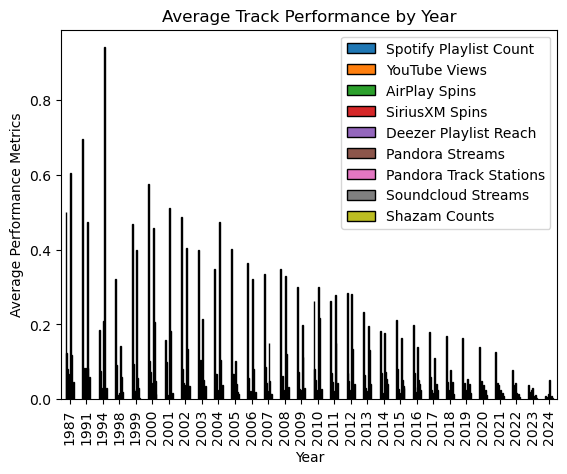

<Figure size 1200x600 with 0 Axes>

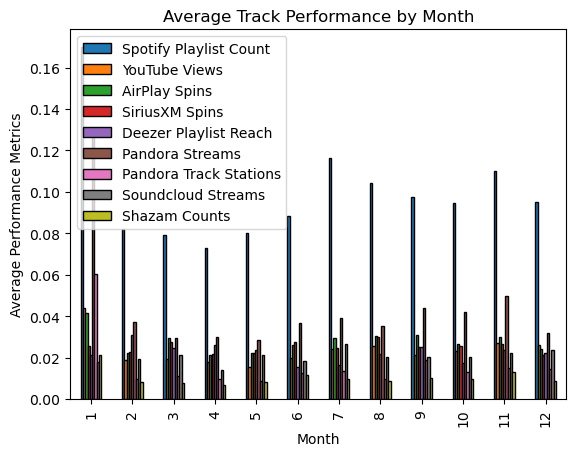

In [45]:
plt.figure(figsize=(12, 6))
performance_by_year.plot(kind='bar', edgecolor='black')
plt.title('Average Track Performance by Year')
plt.xlabel('Year')
plt.ylabel('Average Performance Metrics')
plt.show()

# Plotting performance by month
plt.figure(figsize=(12, 6))
performance_by_month.plot(kind='bar', edgecolor='black')
plt.title('Average Track Performance by Month')
plt.xlabel('Month')
plt.ylabel('Average Performance Metrics')
plt.show()

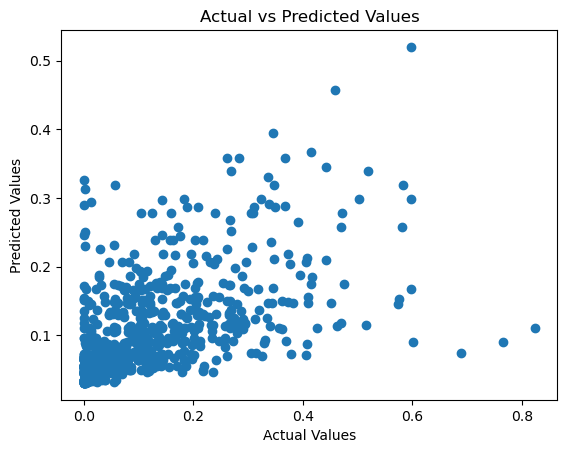

Mean Squared Error: 0.009835979065411879
R-squared: 0.3532718442241748
   Release Date  month  year  Predicted Spotify Playlist Count
0    2024-01-31      1  2024                              0.04
1    2024-02-29      2  2024                              0.04
2    2024-03-31      3  2024                              0.03
3    2024-04-30      4  2024                              0.03
4    2024-05-31      5  2024                              0.03
5    2024-06-30      6  2024                              0.03
6    2024-07-31      7  2024                              0.03
7    2024-08-31      8  2024                              0.03
8    2024-09-30      9  2024                              0.03
9    2024-10-31     10  2024                              0.03
10   2024-11-30     11  2024                              0.02
11   2024-12-31     12  2024                              0.02


In [55]:
#to predict the future performance of spotify
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

feature = ['month', 'year']
target = 'Spotify Playlist Count'
X = df_new[feature]
y = df_new[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

future_dates = pd.DataFrame({
    'Release Date': pd.date_range(start='1/1/2024', periods=12, freq='M')
})
future_dates['month'] = future_dates['Release Date'].dt.month
future_dates['year'] = future_dates['Release Date'].dt.year

future_X = future_dates[['month', 'year']]
future_dates['Predicted Spotify Playlist Count'] = model.predict(future_X)

print(future_dates)


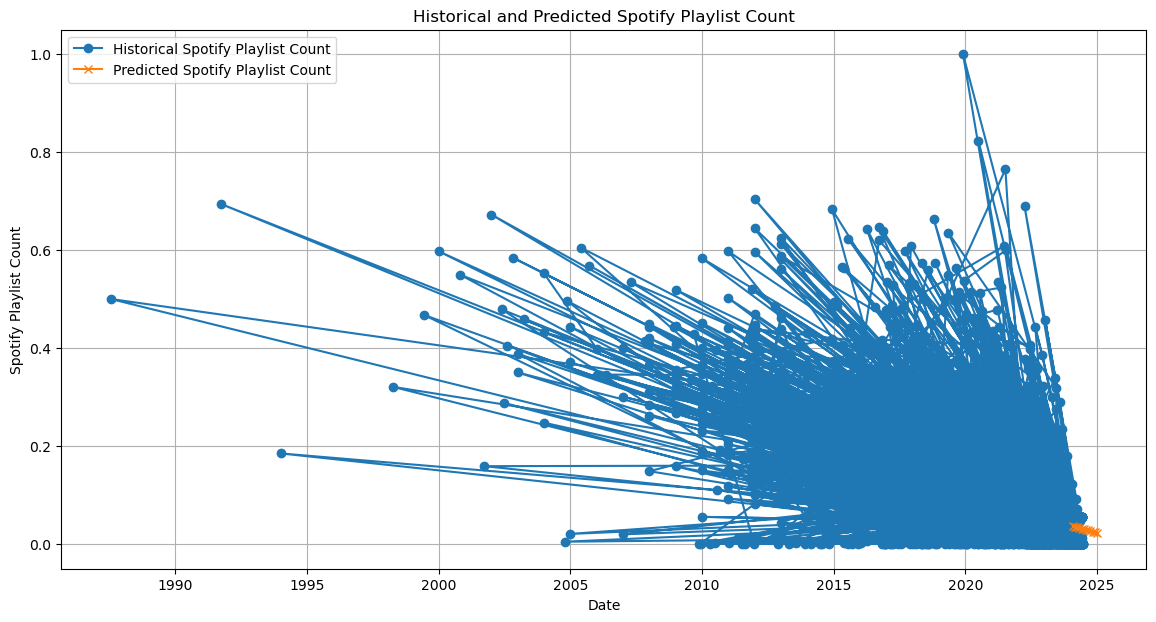

In [56]:

# Plot historical data
plt.figure(figsize=(14, 7))
plt.plot(df_new['Release Date'], df_new['Spotify Playlist Count'], label='Historical Spotify Playlist Count', marker='o')

# Plot future predictions
plt.plot(future_dates['Release Date'], future_dates['Predicted Spotify Playlist Count'], label='Predicted Spotify Playlist Count', marker='x')

plt.xlabel('Date')
plt.ylabel('Spotify Playlist Count')
plt.title('Historical and Predicted Spotify Playlist Count')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
'''predictions were done based on few popular tracks, I used this dataset solely for practicing normalization, replacing missing values, plotting graphs
and finding outliers'''